In [24]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Get the parent directory (project directory)
project_dir = os.path.dirname(notebook_dir)
# Get the parent of the parent directory (grandparent directory)
grandparent_dir = os.path.dirname(project_dir)
# Add the grandparent directory to the Python path
sys.path.append(grandparent_dir)

<hr>

In [25]:
from util import excel_table
from util.structs import Data, Dataset, Measurement;

In [26]:
d_Scheibe = Measurement(299e-3, 1e-3)
r_Scheibe = d_Scheibe/2
m_Scheibe = Measurement(599e-3, 0)
# b_Scheibe = Measurement(3e-3, 1e-3);
d_Loch = Measurement(7e-3, 1e-3)
r_Loch = d_Loch/2

In [27]:
a_error = 1e-3
period_10_error = .5;

table = excel_table.read("./data/104.a", has_header=True)
data = Data()

for row in table:
    data.add(Dataset({
        "i": Measurement(row[0], 0),
        "T(10)": Measurement(row[1], period_10_error),
        "a": Measurement(row[2] / 100, a_error).round(6)
    }))

print(data)

T(10)  | ΔT(10) | a     | Δa    | i   | Δi 
-------+--------+-------+-------+-----+----
12.751 | 0.5    | 0.03  | 0.001 | 1.0 | 0.0
10.02  | 0.5    | 0.059 | 0.001 | 2.0 | 0.0
9.551  | 0.5    | 0.072 | 0.001 | 3.0 | 0.0
9.16   | 0.5    | 0.087 | 0.001 | 4.0 | 0.0
9.1    | 0.5    | 0.101 | 0.001 | 5.0 | 0.0
9.1    | 0.5    | 0.116 | 0.001 | 6.0 | 0.0
9.24   | 0.5    | 0.13  | 0.001 | 7.0 | 0.0
9.41   | 0.5    | 0.145 | 0.001 | 8.0 | 0.0



In [28]:
for row in data:
    row["T"] = row["T(10)"] / 10;

    row["T"] = row["T"].round(2)

print(data)

T    | ΔT   | T(10)  | ΔT(10) | a     | Δa    | i   | Δi 
-----+------+--------+--------+-------+-------+-----+----
1.28 | 0.05 | 12.751 | 0.5    | 0.03  | 0.001 | 1.0 | 0.0
1.0  | 0.05 | 10.02  | 0.5    | 0.059 | 0.001 | 2.0 | 0.0
0.96 | 0.05 | 9.551  | 0.5    | 0.072 | 0.001 | 3.0 | 0.0
0.92 | 0.05 | 9.16   | 0.5    | 0.087 | 0.001 | 4.0 | 0.0
0.91 | 0.05 | 9.1    | 0.5    | 0.101 | 0.001 | 5.0 | 0.0
0.91 | 0.05 | 9.1    | 0.5    | 0.116 | 0.001 | 6.0 | 0.0
0.92 | 0.05 | 9.24   | 0.5    | 0.13  | 0.001 | 7.0 | 0.0
0.94 | 0.05 | 9.41   | 0.5    | 0.145 | 0.001 | 8.0 | 0.0



In [29]:
for row in data:
    row["aT^2"] = row["a"] * row["T"]**2
    row["a^2"] = row["a"]**2;

    row["aT^2"] = row["aT^2"].round(3)
    row["a^2"] = row["a^2"].round(5)

print(data)


T    | ΔT   | T(10)  | ΔT(10) | a     | Δa    | aT^2  | ΔaT^2 | a^2     | Δa^2    | i   | Δi 
-----+------+--------+--------+-------+-------+-------+-------+---------+---------+-----+----
1.28 | 0.05 | 12.751 | 0.5    | 0.03  | 0.001 | 0.049 | 0.005 | 0.0009  | 6e-05   | 1.0 | 0.0
1.0  | 0.05 | 10.02  | 0.5    | 0.059 | 0.001 | 0.059 | 0.006 | 0.00348 | 0.00012 | 2.0 | 0.0
0.96 | 0.05 | 9.551  | 0.5    | 0.072 | 0.001 | 0.066 | 0.007 | 0.00518 | 0.00015 | 3.0 | 0.0
0.92 | 0.05 | 9.16   | 0.5    | 0.087 | 0.001 | 0.074 | 0.009 | 0.00757 | 0.00018 | 4.0 | 0.0
0.91 | 0.05 | 9.1    | 0.5    | 0.101 | 0.001 | 0.084 | 0.01  | 0.0102  | 0.00021 | 5.0 | 0.0
0.91 | 0.05 | 9.1    | 0.5    | 0.116 | 0.001 | 0.096 | 0.011 | 0.01346 | 0.00024 | 6.0 | 0.0
0.92 | 0.05 | 9.24   | 0.5    | 0.13  | 0.001 | 0.11  | 0.012 | 0.0169  | 0.00027 | 7.0 | 0.0
0.94 | 0.05 | 9.41   | 0.5    | 0.145 | 0.001 | 0.128 | 0.014 | 0.02102 | 0.00029 | 8.0 | 0.0



m: (  3.831 ±   0.508) [⋅], n: ( 45.558 ±   4.072)e-3 [⋅]


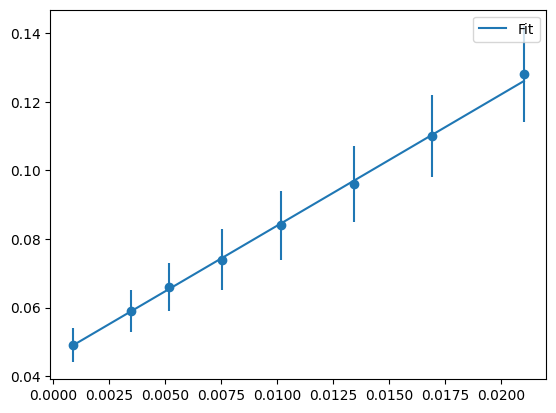

In [30]:
from util.graph_fit import GraphFit

_, params = GraphFit.Linear.on_data(data, "a^2", "aT^2")
print(params)

In [31]:
import numpy as np

# m_Steig = 4 pi^2 / g <=> g = 4 pi^2 / m_Steig
m_Steig = params["m"].round(3)
print(m_Steig.value, m_Steig.error)
# n = 4 pi^2 Theta / m * g <=> Theta = n * m * g / 4 pi^2
n = params["n"].round(5)
print(n.value, n.error)

g = 4 * np.pi**2 / m_Steig;
Theta = n * m_Scheibe * g / 4 / np.pi**2

print(g)
print(Theta)

3.831 0.509
0.04556 0.00408
( 10.305 ±   1.369) [⋅]
(  7.124 ±   1.141)e-3 [⋅]


In [32]:
literatur_g = Measurement(9.818, 0)
formel_Theta = m_Scheibe * r_Scheibe**2 / 2

print(formel_Theta)

(  6.694 ±   0.045)e-3 [⋅]


In [33]:
print(f"Abweichung g: {(g / literatur_g).value * 100 - 100}%")
print(f"Abweichung I: {(Theta / formel_Theta).value * 100 - 100}%")

Abweichung g: 4.960177619406252%
Abweichung I: 6.4190000356530845%


In [34]:
A_Scheibe_ohne_Loch = 2 * np.pi * r_Scheibe**2;
A_Loch = 2 * np.pi * r_Loch**2;
A_Scheibe = A_Scheibe_ohne_Loch - 9 * A_Loch;

print(r_Loch, r_Scheibe)
print((r_Loch**2 / r_Scheibe**2).value)
m_Loch = m_Scheibe * A_Loch / A_Scheibe
print(m_Loch)

print(f"Anteil Loch/Scheibe: {(m_Loch/m_Scheibe).value * 100}%")


(  3.500 ±   0.500)e-3 [⋅] (149.500 ±   0.500)e-3 [⋅]
0.0005480923032180849
(329.935 ±  94.294)e-6 [⋅]
Anteil Loch/Scheibe: 0.05508093525179857%


In [35]:
I_Scheibe = 1/2 * (m_Scheibe + 9 * m_Loch) * r_Scheibe**2
# I_Scheibe = 1/2 * m_Scheibe * r_Scheibe**2
print(I_Scheibe)

(  6.727 ±   0.046)e-3 [⋅]


In [36]:


for row in data:
  row["I"] = 1/2 * m_Loch * r_Loch**2 + m_Loch * row["a"]**2
  row["I"] = row["I"].round(8)

print(f"a: {Measurement(0, 0)}, I: {(1/2 * m_Loch * r_Loch**2).round(8)}")
for a, I in zip(data.column("a"), data.column("I")):
  print(f"a: {a}, I: {I}")


a: (  0.000 ±   0.000) [⋅], I: (  0.000 ±   0.000) [⋅]
a: ( 30.000 ±   1.000)e-3 [⋅], I: (300.000 ±  90.000)e-9 [⋅]
a: ( 59.000 ±   1.000)e-3 [⋅], I: (  1.150 ±   0.340)e-6 [⋅]
a: ( 72.000 ±   1.000)e-3 [⋅], I: (  1.710 ±   0.500)e-6 [⋅]
a: ( 87.000 ±   1.000)e-3 [⋅], I: (  2.500 ±   0.720)e-6 [⋅]
a: (101.000 ±   1.000)e-3 [⋅], I: (  3.370 ±   0.970)e-6 [⋅]
a: (116.000 ±   1.000)e-3 [⋅], I: (  4.440 ±   1.280)e-6 [⋅]
a: (130.000 ±   1.000)e-3 [⋅], I: (  5.580 ±   1.600)e-6 [⋅]
a: (145.000 ±   1.000)e-3 [⋅], I: (  6.940 ±   1.990)e-6 [⋅]


In [37]:
I_Löcher = data.column("I")
I_Löcher_sum = (1/2 * m_Loch * r_Loch**2).error; # Nicht gemessene (Periodenzeit) Loch in der mitte
for i in I_Löcher:
  I_Löcher_sum = I_Löcher_sum + i.error;
print(np.sqrt(I_Löcher_sum))

0.0027369356340589627


In [38]:
I_Löcher = data.column("I")
I_Löcher_sum = 1/2 * m_Loch * r_Loch**2; # Nicht gemessene (Periodenzeit) Loch in der mitte
for i in I_Löcher:
  I_Löcher_sum = I_Löcher_sum + i;
print(I_Löcher_sum)

( 25.992 ±   3.161)e-6 [⋅]


In [39]:
I_ges = I_Scheibe - I_Löcher_sum;
print(I_ges)

(  6.701 ±   0.046)e-3 [⋅]


In [40]:
print((I_ges / I_Scheibe).value)

0.9961362125077344
